In [16]:
from sklearn import datasets 
from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame
raw_df = pd.read_excel("test.xlsx")
raw_df

,1,TV,Radio,Newspaper,result
0,2.0,1,2,1,8
1,3.0,2,3,2,14
2,4.0,3,4,3,20
3,5.0,4,5,4,26
4,6.0,5,6,5,32
...,...,...,...,...,...
6663,NaN,570,473,478,2950
6664,NaN,571,474,479,2956
6665,NaN,572,475,480,2962
6666,NaN,573,476,481,2968


In [17]:
x=raw_df[['TV', 'Radio', 'Newspaper']]
y=raw_df['result']
x.shape

(6668, 3)

In [18]:
# 导入线性回归模型构建类
from sklearn.linear_model import LinearRegression

# 构造训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
# X_train
# 创建一个线性模型对象 LinearRegression()
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [28]:
# X_test
# print(X_test)
data1 = {'TV':[2,10,20,3,3,90,3],
       'Radio':[3,15,30,5,3,90,20],
       'Newspaper':[6,20,40,7,3,90,40]}
test = DataFrame(data1)
# 进行线性回归预测
y_pred = linreg.predict(test)

# y_test={'result':[26,100]}
y_test=[26,100,200,34,18,540,163]
y_pred
# 进行各系数的打印
print(linreg.intercept_,linreg.coef_)
feature_cols=['TV', 'Radio', 'Newspaper']
zip(feature_cols,linreg.coef_)
# y_pred

-1.0913936421275139e-11 [1. 2. 3.]


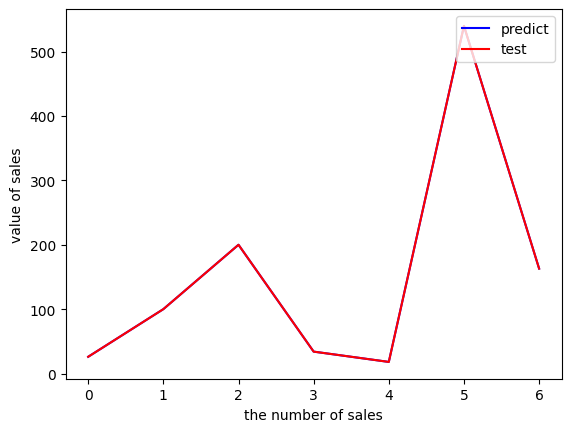

In [29]:
# 画图
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()


In [35]:
# 保存加载模型
# https://blog.csdn.net/weixin_39441762/article/details/89188427
import joblib
joblib.dump(linreg, 'multip.pkl')
# 加载模型
new_linreg=joblib.load('multip.pkl')
# 预测结果
data1 = {'TV':[2,10,20,3,3,90,3],
       'Radio':[3,15,30,5,3,90,20],
       'Newspaper':[6,20,40,7,3,90,40]}
test = DataFrame(data1)
# 进行线性回归预测
y_pred = new_linreg.predict(test)
y_pred



array([ 26., 100., 200.,  34.,  18., 540., 163.])

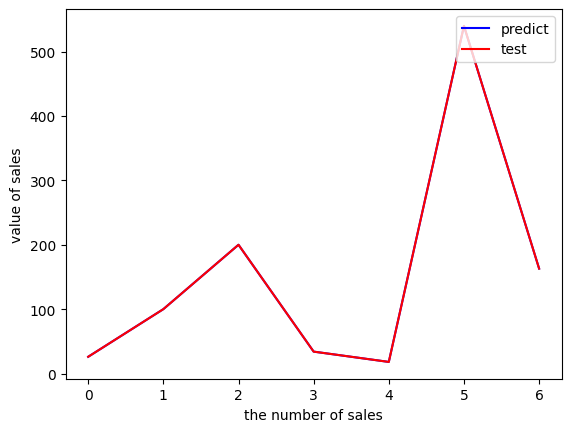

In [36]:
# 画图
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
# 基于逻辑回归
# 基于训练集使用逻辑回归建模
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
 
# # 将模型应用于测试集并查看混淆矩阵
# y_pred = classifier.predict(X_test)

# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)
# 数据验证

KeyboardInterrupt: 

In [12]:
# X_test
# print(X_test)
data1 = {'TV':[2,10],
       'Radio':[3,15],
       'Newspaper':[6,20]}
test = DataFrame(data1)
y_pred = classifier.predict(test)
y_pred

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [4]:
y_pred = linreg.predict(test)
y_pred

NameError: name 'linreg' is not defined

In [121]:
from sklearn import metrics
import numpy as np
# calculate MAE by hand
# print("MAE by hand:",(10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
print("MAE%s"%float(metrics.mean_absolute_error(y_test, y_pred)))

# calculate MSE by hand
# print "MSE by hand:",(10**2 + 0**2 + 20**2 + 10**2)/4.

# calculate MSE using scikit-learn
# print "MSE:",metrics.mean_squared_error(true, pred)


# calculate RMSE by hand
# print "RMSE by hand:",np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate RMSE using scikit-learn
# print "RMSE:",np.sqrt(metrics.mean_squared_error(true, pred))

MAE1.5336311905439442e-12
